# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2025
## Lab 5: Gordus 
## February 28, 2025

#  1. Thermodynamics: 2-State Transitions

Today we’re going to explore the thermodynamic properties of a two-state equilibrium between folding states **F** and **U**.

## Libraries you will need

In [27]:
import numpy as np
import matplotlib.pyplot as plt

## A. Define Constants

For a two-state equilibrium between folding states **F** and **U**, we will need to define:

$\Delta H(T_m)$ - the enthalpy difference between **U** and **F** at the transition temperature. <br>
$T_m$ - the transition temperature.<br>
$\Delta C_p$ - the heat capacity difference between **U** and **F**.

Experimentally, $\Delta H$ can be measured through calorimetry, which enables us to calculate $\Delta G$ and $\Delta S$.

We know that $\Delta G(T) = \Delta H(T) - T \cdot \Delta S(T)$  
Because at $T_m$ the $\Delta G(T_m) = 0$, we can write the expression:

$\Delta G(T_m) = 0 = \Delta H(T_m) - T_m \cdot \Delta S(T_m)$

which lets us calculate the entropy difference as:

$\Delta S(T_m) = \frac{\Delta H(T_m)}{T_m}$.

I will provide you with the following:

$R = 1.987 \times 10^{-3}$ kcal/mol·K<br>
$T_m = 323.15$ K<br>
$\Delta H(T_m) = 100$ kcal/mol<br>
$\Delta C_p = 0$ kcal/mol·K<br>

**Do the following:**

Calculate $\Delta S(T_m)$ in kcal/mol.

# <font color='red'>Student Input Cell: 2 points</font>   

In [28]:
R = 1.987 * 10**-3
Tm = 323.15
deltaHTm = 100
deltaSTm = deltaHTm / Tm

print(deltaSTm)

0.3094538140182578


## B. Define Thermodynamic Functions

From the $\Delta$H(Tm), $\Delta$S(Tm) and $\Delta$Cp, we can calcualte the enthalpy, entropy, and free energy differences at any temperature:

1. $\Delta$H(T) = $\Delta$H(Tm) + $\Delta$Cp(T - Tm)
2. $\Delta$S(T) = $\Delta$S(Tm) + $\Delta$Cp*ln(T / Tm)
3. $\Delta$G(T) = $\Delta$H(T) - T*$\Delta$S(T)

**Do the following:**

1. Plot $\Delta$H(T) and T*$\Delta$S(T) in the same plot for the temperature range (in K): (273, 373).
2. Plot $\Delta$G(T) in a separate plot for the same temperature range.

# <font color='red'>Student Input Cell: 10 points</font>   

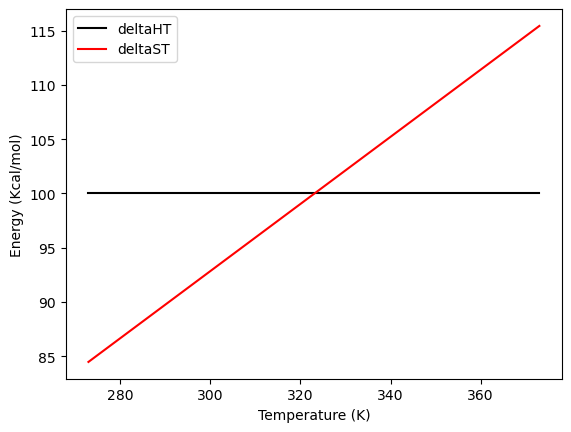

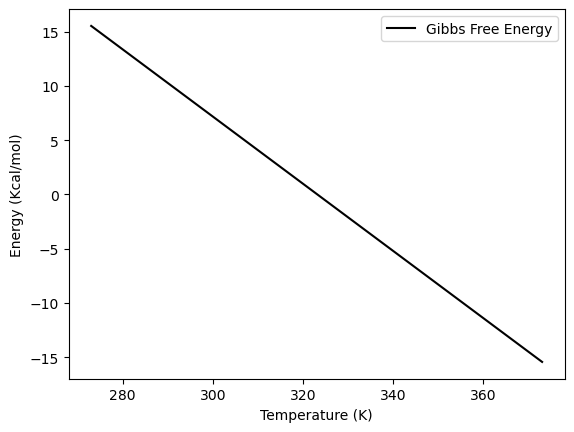

In [29]:
def find_deltaHT(deltaCp,T,deltaHTm,Tm):
    return deltaHTm + deltaCp*(T-Tm)

def find_deltaST(deltaCp,T,deltaSTm,Tm):
    return deltaSTm + deltaCp*np.log(T/Tm)

def find_deltaGT(deltaHT,deltaST,T):
    return deltaHT - T*deltaST

temp_range = np.linspace(273,373)

plt.plot(temp_range,find_deltaHT(0,temp_range,deltaHTm,Tm),'k',label="deltaHT")
plt.plot(temp_range,temp_range*find_deltaST(0,temp_range,deltaSTm,Tm),'r',label="deltaST")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Energy (Kcal/mol)")
plt.show()
plt.plot(temp_range,find_deltaGT(find_deltaHT(0,temp_range,deltaHTm,Tm),find_deltaST(0,temp_range,deltaSTm,Tm),temp_range),'k',label="Gibbs Free Energy")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Energy (Kcal/mol)")
plt.show()

## C. Develop Expressions for the Statistical Weights and Probabilities

The statistical weight (which is essentially an equilibrium constant) can be determined at any temperature by the expression:

4. K = exp[-$\Delta$G / RT]

The partition function is just the sum of all the statistical weights at any temperature:

5. Q = $\Sigma$K

and the probability of any state is:

6. P = K / Q

This is shown in the table below. The free energy difference, $\Delta$Gu (Gu - Gf), allows us to determine all the expressions you require to calculate the probabilities.

<img src="http://www.gordus.org/public_images/Hilser.png" style="width: 800px;"/>

**Do the following:**

1. Define the statistical weight for both **F** and **U** states over the temperature range:(273, 373).
2. Calculate the partition function as a function of these weights.
3. Calculate the probability of being in state **F**.
4. Calculate the probability of being in state **U**.
5. Plot the **F** and **U** probabilities in the same plot for the temperature range: (273, 373).
4. Plot $\Delta$G(T) in a separate plot for the same temperature range.

# <font color='red'>Student Input Cell: 12 points</font>   

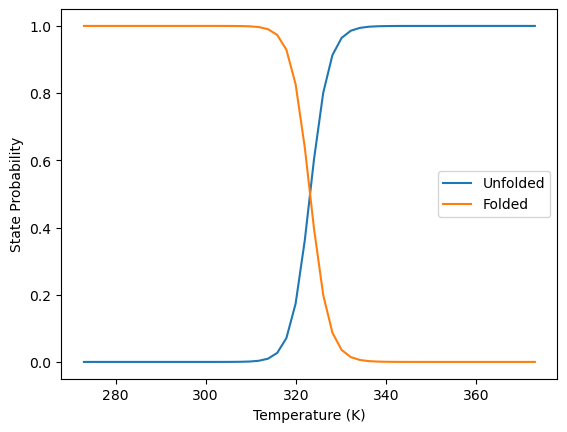

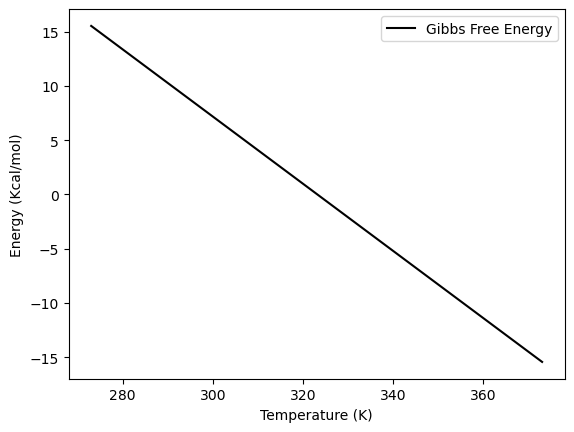

In [30]:
def K(deltaG,R,T):
    return np.exp(-deltaG/(R*T))

def Q(deltaG,R,T):
    return 1 + np.exp(-deltaG/(R*T))

def PU(K,Q):
    return K/Q

def PF(Q):
    return 1/Q

plt.plot(temp_range,PU(K(find_deltaGT(find_deltaHT(0,temp_range,deltaHTm,Tm),find_deltaST(0,temp_range,deltaSTm,Tm),temp_range),R,temp_range),Q(find_deltaGT(find_deltaHT(0,temp_range,deltaHTm,Tm),find_deltaST(0,temp_range,deltaSTm,Tm),temp_range),R,temp_range)),label="Unfolded")
plt.plot(temp_range,PF(Q(find_deltaGT(find_deltaHT(0,temp_range,deltaHTm,Tm),find_deltaST(0,temp_range,deltaSTm,Tm),temp_range),R,temp_range)),label="Folded")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("State Probability")
plt.show()
plt.plot(temp_range,find_deltaGT(find_deltaHT(0,temp_range,deltaHTm,Tm),find_deltaST(0,temp_range,deltaSTm,Tm),temp_range),'k',label="Gibbs Free Energy")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Energy (Kcal/mol)")
plt.show()


# 2. Conformational Equilibrium (2 - State)

I told you in class that in order to simulate a two-state transition, you need two parameters ($\Delta$H and $\Delta$S), which are constant and therefore are the same at every temperature. **This is technically not true in most cases.** Both entropy and enthalpy are often temperature dependent, which is determined by the heat capacity difference ($\Delta$Cp), obeying the following relationships:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_1.png" />

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_2.png"/>

This just means that instead of writing the Gibbs energy at any temperature (i.e., $\Delta$G(T)) in terms of two constant parameters (yellow), as we did in class and as reproduced here:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3a.png"/>

Equation 3a becomes

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3b.png"/>

where the $\Delta$H(T) and $\Delta$S(T) vary with temperature according to eqs. 1 and 2. This means that to get an expression for the Gibbs energy at any temperature (i.e. $\Delta$G(T)) expressed in terms of constants, you just need to substitute eqs. 1 & 2 into eq. 3b and you get:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3c.png"/>

which has four constants(yellow), the enthalpy and entropy at some reference temperature, T<sub>ref</sub> (i.e., $\Delta$H(T<sub>ref</sub>), $\Delta$S(T<sub>ref</sub>)), and $\Delta$Cp.

The next important issue regards rewriting equation 3a in terms of the transition temperature (Tm) and the enthalpy at the Tm (i.e., $\Delta$H(Tm)) instead of in terms of $\Delta$H and $\Delta$S. The reason is entirely practical; it allows you to specify which temperature is the midpoint of the transition between the two states (i.e., where $\Delta$G = 0). We can get this by noting that at the transition temperature (i.e., T = Tm), equation 3a gives:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6.png"/>

which, when rearranged, yields:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3d.png"/>

That allows us to rewrite equation 3a as:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3e.png" />

Note, this is exactly equivalent to eq. 3a. Thus, to simulate a two-transition when $\Delta$Cp = 0, you still need just two parameters, the enthalpy difference at Tm (i.e., $\Delta$H(Tm)) and the transition temperature (Tm), both of which are constant (yellow).

In the case when $\Delta$Cp $\neq$ 0, you need to start with eq. 3c, which after subsituting eq. 3d in place of $\Delta$S(T<sub>ref</sub>) becomes:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_4a.png" />

And upon rearranging gives:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_4b.png" />

where you can see that there are just 3 constants (yellow), and that when there is no heat capacity difference (i.e., $\Delta$Cp = 0), the second part of the equation (i.e. after the '+' sign) goes to 0, and equation 4b reduces to eq. 3e. Thus, eq. 4b is the general expression for the energy difference between two states in a two-state transition. It is the expression you will use in every simulation where the temperature dependence of a conformational transition is modeled.

## Do the following:

**1. Free Energy Simulations I (Exploring Enthalpy)**: On one graph, plot $\Delta$G vs. T (273 -> 373 K) for the following three cases:

a. Case 1: $\Delta$H = 50 kcal/mol, Tm = 50C, $\Delta$Cp = 0. <br>
b. Case 2: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 0. <br>
c. Case 3: $\Delta$H = 150 kcal/mol, Tm = 50C, $\Delta$Cp = 0.

**NOTE: Tm is in Celsius, but the calculations should be in Kelvin!**

**NOTE: It may help to write a function for $\Delta$G, first.**

By inspecting the graph, what's the difference between these cases?

# <font color='red'>Student Input Cell: 6 points</font>   

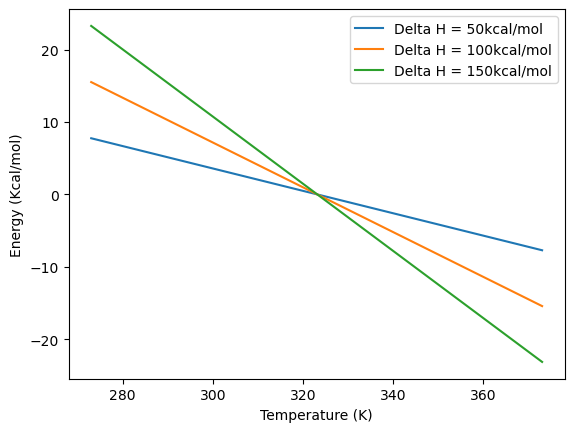

In [31]:
def delta_G(H, Cp, Tm, T):
  return H*(1-T/Tm)+Cp*(T*(1-np.log(T/Tm))-Tm)

plt.plot(temp_range,delta_G(50,0,50+273.15,temp_range),label="Delta H = 50kcal/mol")
plt.plot(temp_range,delta_G(100,0,50+273.15,temp_range),label="Delta H = 100kcal/mol")
plt.plot(temp_range,delta_G(150,0,50+273.15,temp_range),label="Delta H = 150kcal/mol")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Energy (Kcal/mol)")
plt.show()

##-------------------------------------------- ##
## Answer the question above as a comment below##
##-------------------------------------------- ##

# As Delta H increases, Delta G scales more steeply as a function of temperature.

**2. Population Simulations I:**
For a 2-state transition, write the expression for the statistical weights and the partition function.

a. For each case from Question 1, make a plot of the probability of the folded and unfolded states vs. T(273 -> 373 K). <br>
b. On one graph, plot the folded probability vs. T for each case. What do you observe?

# <font color='red'>Student Input Cell: 10 points</font>   

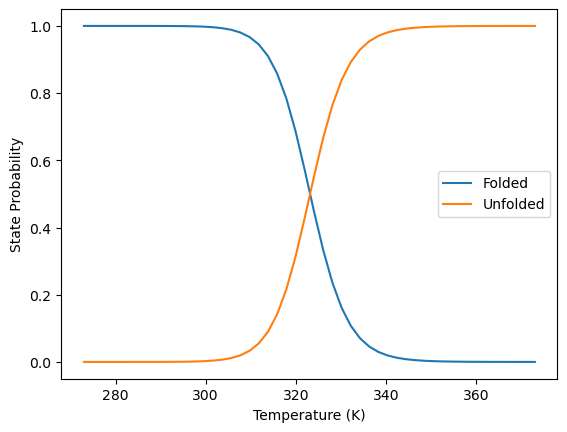

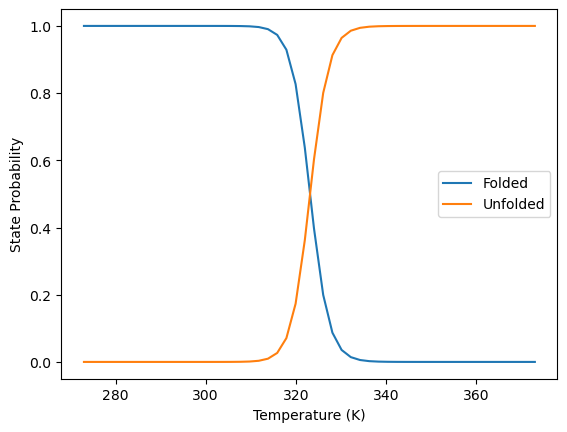

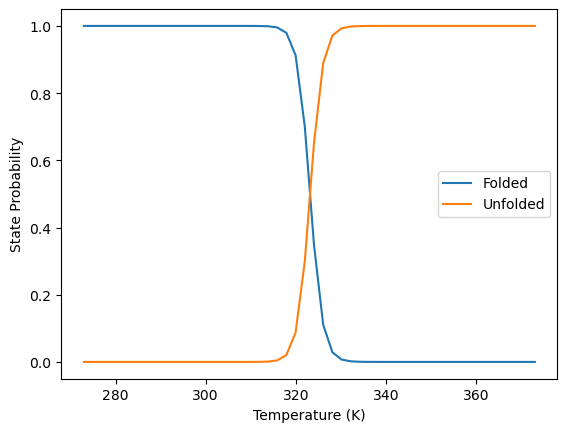

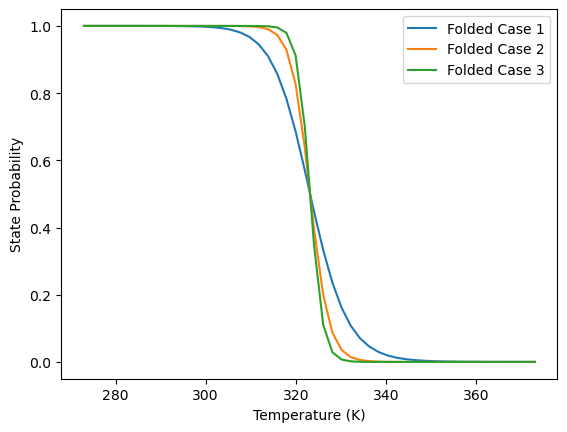

In [32]:
def prob_calc(G, T, R):
    return PF(Q(G,R,T)),PU(K(G,R,T),Q(G,R,T))

# Case 1.
plt.plot(temp_range,prob_calc(delta_G(50,0,50+273.15,temp_range),temp_range,R)[0],label="Folded")
plt.plot(temp_range,prob_calc(delta_G(50,0,50+273.15,temp_range),temp_range,R)[1],label="Unfolded")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("State Probability")
plt.show()

# Case 2.
plt.plot(temp_range,prob_calc(delta_G(100,0,50+273.15,temp_range),temp_range,R)[0],label="Folded")
plt.plot(temp_range,prob_calc(delta_G(100,0,50+273.15,temp_range),temp_range,R)[1],label="Unfolded")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("State Probability")
plt.show()

# Case 3.
plt.plot(temp_range,prob_calc(delta_G(150,0,50+273.15,temp_range),temp_range,R)[0],label="Folded")
plt.plot(temp_range,prob_calc(delta_G(150,0,50+273.15,temp_range),temp_range,R)[1],label="Unfolded")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("State Probability")
plt.show()

# Folded Probabilities for all three
plt.plot(temp_range,prob_calc(delta_G(50,0,50+273.15,temp_range),temp_range,R)[0],label="Folded Case 1")
plt.plot(temp_range,prob_calc(delta_G(100,0,50+273.15,temp_range),temp_range,R)[0],label="Folded Case 2")
plt.plot(temp_range,prob_calc(delta_G(150,0,50+273.15,temp_range),temp_range,R)[0],label="Folded Case 3")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("State Probability")
plt.show()


##----------------------------------------------- ##
## What do you observe? Answer below as a comment ##
##----------------------------------------------- ##


# As Delta H increases, the folded state remains more likely at higher temperatures, and the transition to it being unlikely occurs over a smaller temperature range.

**3. Free Energy Simulations II (Exploring Heat Capacity)**: On one graph plot $\Delta$G vs. T (in Kelvin) for the following three cases:

a. Case 1: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 0 cal/(mol * K). <br>
b. Case 2: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 1.500 kcal/(mol * K). <br>
c. Case 3: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 3.0 kcal/(mol * K). <br>

By inspecting the graph, what is the difference between these cases?

# <font color='red'>Student Input Cell: 8 points</font>   

[]

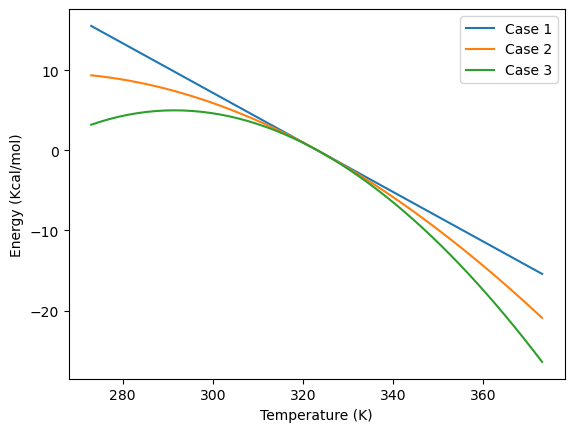

In [33]:
plt.plot(temp_range,delta_G(100,0,50+273.15,temp_range),label="Case 1")
plt.plot(temp_range,delta_G(100,1.5,50+273.15,temp_range),label="Case 2")
plt.plot(temp_range,delta_G(100,3,50+273.15,temp_range),label="Case 3")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Energy (Kcal/mol)")
plt.plot()

##----------------------------------------------- ##
## What do you observe? Answer below as a comment ##
##----------------------------------------------- ##

# As Delta CP increases, Delta G becomes less and less linear, decreasing at both lower and higher values of temperature. As a result, the temperature range as which the protein can remain folded becomes smaller and smaller as Delta Cp increases.

**4. Population Simulations**:

For each case from Question 3, make a plot of probability of the folded and unfolded states vs. T (between 150 and 400 K). <br>


What do you observe? How do you interpret it?

# <font color='red'>Student Input Cell: 8 points</font>   

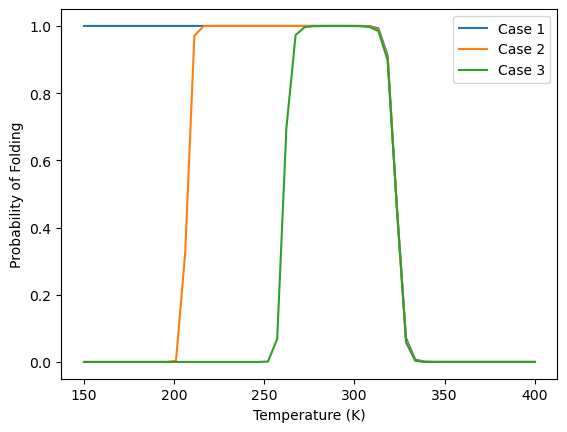

In [34]:
expanded_temp_range = np.linspace(150,400)

plt.plot(expanded_temp_range,prob_calc(delta_G(100,0,50+273.15,expanded_temp_range),expanded_temp_range,R)[0],label="Case 1")
plt.plot(expanded_temp_range,prob_calc(delta_G(100,1.5,50+273.15,expanded_temp_range),expanded_temp_range,R)[0],label="Case 2")
plt.plot(expanded_temp_range,prob_calc(delta_G(100,3,50+273.15,expanded_temp_range),expanded_temp_range,R)[0],label="Case 3")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Probability of Folding")
plt.show()



##----------------------------------------------- ##
## What do you observe? Answer below as a comment ##
##----------------------------------------------- ##

# As Delta CP increases, Delta G becomes less and less linear, decreasing at both lower and higher values of temperature. As a result, the temperature range as which the protein can remain folded becomes smaller and smaller as Delta Cp increases.